# Importing necessaries and getting data

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import re
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

In [ ]:
from  google.colab import drive

drive.mount('/content/gdrive/')

emergency_tweets_path = '/content/gdrive/MyDrive/emergency_tweet_23.csv'

df = pd.read_csv(emergency_tweets_path, encoding = 'latin')
df.head(10)

Mounted at /content/gdrive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,text,hashtags,lang,cleaned,emergency
0,0,172534,Leah,"Missouri, USA",Hilarious fatty. Loves her husband and fried c...,17/08/2019 4:26,4.0,70.0,688.0,We really need to get this pandemic shit under...,NaN,en,really need pandemic shit control many future ...,0
1,1,4968,News Ghana,"Accra, Ghana",GhanaÃÂ¢ÃÂÃÂs leading online news publica...,03/06/2011 20:41,30390.0,4067.0,598.0,#EmergingMarkets #CAFS #Covid19 COVID-19 threa...,"['EmergingMarkets', 'CAFS', 'Covid19']",en,emergingmarkets cafs threatens survival south ...,0
2,2,65920,Trinity Care Foundation,"Bengaluru, India",Non-Profit Organization : Focusing on Health a...,17/10/2013 15:19,733.0,591.0,7076.0,Fight Against #COVID19 Project by @tcfindia at...,"['COVID19', 'Karnataka', 'flickr']",en,fight project tcfindia chikkaballapur hospital...,0
3,3,142424,The Korea Herald,"Seoul, Korea",ÃÂ¬ÃÂ½ÃÂÃÂ«ÃÂ¦ÃÂ¬ÃÂ¬ÃÂÃÂÃÂ­ÃÂÃ...,13/07/2009 1:58,65722.0,25.0,32.0,Culture sector scrambles as COVID-19 cases soa...,"['SouthKorea', 'culture', 'COVID19', 'pandemic']",en,culture sector scramble case soar southkorea c...,0
4,4,60448,Maricopa County,"Phoenix, AZ",The 4th most populous County in the US. About ...,03/03/2010 21:11,8952.0,332.0,1097.0,#Covid19 spreads mainly from person to person ...,['Covid19'],en,spread mainly person person infected person co...,0
5,5,57125,GlobalPandemic.NET,WORLDWIDE,Breaking News & Critical Information to SURVIV...,13/07/2010 21:58,26117.0,25282.0,2.0,"ALERT: ÃÂ¢ÃÂÃÂCorona, false alarmÃÂ¢ÃÂ...",NaN,en,alert corona false alarm thousand take street ...,0
6,6,61160,stiff middle finger,The seventh house,"The #counterculture, #Aquarius & #loveandpeace...",28/04/2015 18:36,7551.0,666.0,43324.0,Boris Johnson and Dominic Cummings #CareHomeic...,"['CareHomeicide', 'SecondPeak', 'Secondwave', ...",en,boris johnson dominic cummings carehomeicide s...,0
7,7,122228,Kedar Chounde,NaN,BeatboxerÃÂ°ÃÂÃÂÃÂ¤ \nMedicoÃÂ°ÃÂÃÂ...,08/04/2020 15:14,11.0,24.0,29.0,*When you accidentally turn on the Video durin...,NaN,en,accidentally turn video online class frontbenc...,0
8,8,126651,Nightstar,"Oregon, USA",I ask questions. I try to remind people of the...,02/08/2020 4:58,3.0,9.0,47.0,Wait the government works for the people yet w...,NaN,en,wait government work people yet yall taking va...,0
9,9,113152,Gerard Anthony Naval,Philippines,"I always turn to the sports pages first, which...",25/02/2012 0:28,514.0,219.0,12.0,The DOH said the number of #COVID19 fatalities...,['COVID19'],en,doh said number fatality rose new death report...,1


# Cleaning and visualizing data

In [ ]:
df.cleaned.head(10)

0    really need pandemic shit control many future ...
1    emergingmarkets cafs threatens survival south ...
2    fight project tcfindia chikkaballapur hospital...
3    culture sector scramble case soar southkorea c...
4    spread mainly person person infected person co...
5    alert corona false alarm thousand take street ...
6    boris johnson dominic cummings carehomeicide s...
7    accidentally turn video online class frontbenc...
8    wait government work people yet yall taking va...
9    doh said number fatality rose new death report...
Name: cleaned, dtype: object

In [ ]:
df = df[['cleaned', 'emergency']]

In [ ]:
np.sum(df.duplicated())

17313

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.emergency.value_counts()

0    146961
1     14839
Name: emergency, dtype: int64

# Splitting training and testing data

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

df['cleaned'] = df['cleaned'].values.astype('U')

X = df['cleaned'].to_numpy()
y = df['emergency'].to_numpy()
for train_index, test_index in sss.split(X, y):
    print("Training indices:", train_index, "Testing indices:", test_index)
    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y[train_index], y[test_index]

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

Training indices: [ 14102  82592  12432 ... 158205 106528  78189] Testing indices: [ 46384  59083  10272 ...  21182  63206 104660]
129440
32360
129440
32360


In [ ]:
tweets_pipeline = Pipeline([('CVec', CountVectorizer(stop_words='english')),
                     ('Tfidf', TfidfTransformer())])

X_train_transformed = tweets_pipeline.fit_transform(X_train)
X_test_transformed = tweets_pipeline.transform(X_test)

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(class_weight='balanced'), 
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced')
}



# Calculating and plotting roc curve and performance metrics

In [ ]:

def plot_roc(plt, y_test, y_predicted, color, name):
      fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
      roc_auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, color, label = name + 'AUC = %0.2f' % roc_auc)
      plt.legend(loc = 'lower right')
      plt.plot([0, 1], [0, 1],'w--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      return plt

In [ ]:
def plot_compmet(classifier, y_test, y_pred):
      print("\nClassifier: ", classifier)
      acc = metrics.accuracy_score(y_test, y_pred)
      f1 = metrics.f1_score(y_test, y_pred, average='macro', zero_division= 0 )
      ps = metrics.precision_score(y_test, y_pred, average='macro', zero_division= 0 )
      rs = metrics.recall_score(y_test, y_pred, average='macro', zero_division= 0)
      print("\t\t\t\tAccuracy\tF1-score       \tPrecision_score     Recall_score")
      print("Algorithm -",classifier, acc, f1, ps, rs)
      print("\n")

In [ ]:
no_classifiers = len(classifiers.keys())

from time import process_time 
import sklearn.metrics as metrics


def batch_classify(X_train_transformed, y_train, X_test_transformed, y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['Classifier', 'Area Under Curve', 'Training time'])
    count = 0
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.figure(figsize=(15, 15))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    i = 0
    for key, classifier in classifiers.items():
        t_start = process_time()  
        #classifier.fit(X_train_transformed, y_train)
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        classifier_model = predict_tweet(key)
        y_predicted = classifier_model.predict(X_test_transformed)
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Area Under Curve'] = roc_auc_score(y_test, y_predicted)
        plot_compmet(key, y_test, y_predicted)
        plt = plot_roc(plt, y_test, y_predicted, colors[i], key)
        i+=1
        df_results.loc[count,'Training time'] = t_elapsed
        if verbose:
            print("\nTime taken to train {c}: {f:.2f} s".format(c=key, f=t_elapsed))
        count+=1
    #plt.show()
    plt.savefig("final_plot.png")
    return df_results

In [ ]:
import pickle
def predict_tweet(model):
  with open(f"/content/gdrive/MyDrive/project/{model}.pkl", 'rb') as file:
    classifier = pickle.load(file)
  return classifier


Classifier:  Logistic Regression
				Accuracy	F1-score       	Precision_score     Recall_score
Algorithm - Logistic Regression 0.9589616810877627 0.8940907729748389 0.8488039696739154 0.959991818005743



Time taken to train Logistic Regression: 0.00 s

Classifier:  Decision Tree
				Accuracy	F1-score       	Precision_score     Recall_score
Algorithm - Decision Tree 0.9827564894932015 0.9497828994944151 0.9370141021027252 0.9635491330497545



Time taken to train Decision Tree: 0.00 s

Classifier:  k-Nearest Neighbors
				Accuracy	F1-score       	Precision_score     Recall_score
Algorithm - k-Nearest Neighbors 0.93831891223733 0.7416489662344407 0.929349719511138 0.6778316834842933



Time taken to train k-Nearest Neighbors: 0.00 s

Classifier:  Linear SVM
				Accuracy	F1-score       	Precision_score     Recall_score
Algorithm - Linear SVM 0.9790482076637824 0.9391078250944209 0.9258465431765353 0.953480795698483



Time taken to train Linear SVM: 0.00 s


FileNotFoundError: ignored

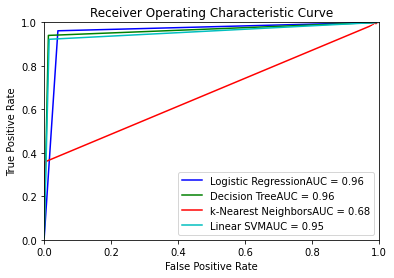

In [ ]:
df_results = batch_classify(X_train_transformed, y_train, X_test_transformed, y_test)
print(df_results.sort_values(by='Area Under Curve', ascending=False))

# Save Model

In [ ]:
import pickle
def save_model(root_path, model_names, classifiers):
  for model_name in model_names:
    final_path = root_path + "/" + f"{model_name}.pkl"
    with open(final_path, 'wb') as file:
      pickle.dump(classifiers[model_name], file)
    print(f"Model {model_name} save in {final_path}")


In [ ]:
save_model("/content/gdrive/MyDrive/project", classifiers.keys(), classifiers)

Model Logistic Regression save in /content/gdrive/MyDrive/project/Logistic Regression.pkl
Model Decision Tree save in /content/gdrive/MyDrive/project/Decision Tree.pkl
Model k-Nearest Neighbors save in /content/gdrive/MyDrive/project/k-Nearest Neighbors.pkl
Model Linear SVM save in /content/gdrive/MyDrive/project/Linear SVM.pkl
Model Gradient Boosting Classifier save in /content/gdrive/MyDrive/project/Gradient Boosting Classifier.pkl
Model Random Forest save in /content/gdrive/MyDrive/project/Random Forest.pkl
Model RidgeClassifier save in /content/gdrive/MyDrive/project/RidgeClassifier.pkl


In [ ]:
import pickle
with open('/content/gdrive/MyDrive/project/Decision Tree.pkl', 'rb') as f:
  lr = pickle.load(f)

import numpy
a = numpy.array(["10 positive case","social distancing musrt be maintained", "I bought a new car", " "])
array = tweets_pipeline.transform(a)
print(lr.predict(array))

[1 1 0 0]


In [ ]:
!pwd

/content
